## load dataset


In [135]:

import pandas as pd
import numpy as np

df = pd.read_csv('kidney_disease.csv')
df = df.sample(frac=0.2, random_state=42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 209 to 289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              80 non-null     int64  
 1   age             76 non-null     float64
 2   bp              79 non-null     float64
 3   sg              70 non-null     float64
 4   al              70 non-null     float64
 5   su              70 non-null     float64
 6   rbc             48 non-null     object 
 7   pc              67 non-null     object 
 8   pcc             80 non-null     object 
 9   ba              80 non-null     object 
 10  bgr             71 non-null     float64
 11  bu              76 non-null     float64
 12  sc              76 non-null     float64
 13  sod             67 non-null     float64
 14  pot             67 non-null     float64
 15  hemo            71 non-null     float64
 16  pcv             67 non-null     object 
 17  wc              64 non-null     object 

In [136]:
df = pd.read_csv('kidney_disease.csv')
df


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [137]:
df = df.drop(['id','age'], axis=1)

In [138]:
df.sample()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
383,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,119.0,46.0,...,49,5100,5.0,no,no,no,good,no,no,notckd


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              388 non-null    float64
 1   sg              353 non-null    float64
 2   al              354 non-null    float64
 3   su              351 non-null    float64
 4   rbc             248 non-null    object 
 5   pc              335 non-null    object 
 6   pcc             396 non-null    object 
 7   ba              396 non-null    object 
 8   bgr             356 non-null    float64
 9   bu              381 non-null    float64
 10  sc              383 non-null    float64
 11  sod             313 non-null    float64
 12  pot             312 non-null    float64
 13  hemo            348 non-null    float64
 14  pcv             330 non-null    object 
 15  wc              295 non-null    object 
 16  rc              270 non-null    object 
 17  htn             398 non-null    obj

In [140]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
        

C:\Users\acer\AppData\Local\Temp\ipykernel_13416\2956881624.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_13416\2956881624.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [141]:
numerical

['bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [142]:
catgcols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [143]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [144]:
df['classification'] = df['classification'].replace(['ckd\t'],'ckd')

In [145]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [146]:
ind_col = [col for col in df.columns if col != 'classification']
dep_col = 'classification'

In [147]:
df[dep_col].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

## transformasi dtaset

In [148]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [149]:
df['classification'] = le.fit_transform(df['classification'])

In [150]:
x = df[ind_col]  #feature
y = df[dep_col]  #label

In [151]:
df.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,32,72,34,1,4,1,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,...,26,56,34,0,3,1,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,19,70,34,0,4,1,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,20,62,19,1,3,1,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,23,68,27,0,3,1,0,0,0,0


In [152]:
df.to_csv('kidney_clean.csv', index=False)

In [153]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

## Membuat Model Decision Tree

In [154]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Akurasi Data Training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi Data Testing = {dtc_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"Nilai Classfication Report : \n {classification_report(y_test, dtc.predict(x_test))}")



Akurasi Data Training = 0.9923076923076923
Akurasi Data Testing = 0.9928571428571429 

Confusion Matrix : 
[[85  1]
 [ 0 54]]

Nilai Classfication Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.98      1.00      0.99        54

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



## SIMULASI MODEL

In [155]:
input_data = (80,1.02,1,0,1,1,0,0,121,36,1.2,138,4.4,15.4,32,72,34,1,4,1,0,0,0)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ('Pasien Tidak Terkena Batu Ginjal')
else:
    print ('Pasien Terkena Batu Ginjal')



[0]
Pasien Tidak Terkena Batu Ginjal


c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## visualisasi Decision Tree

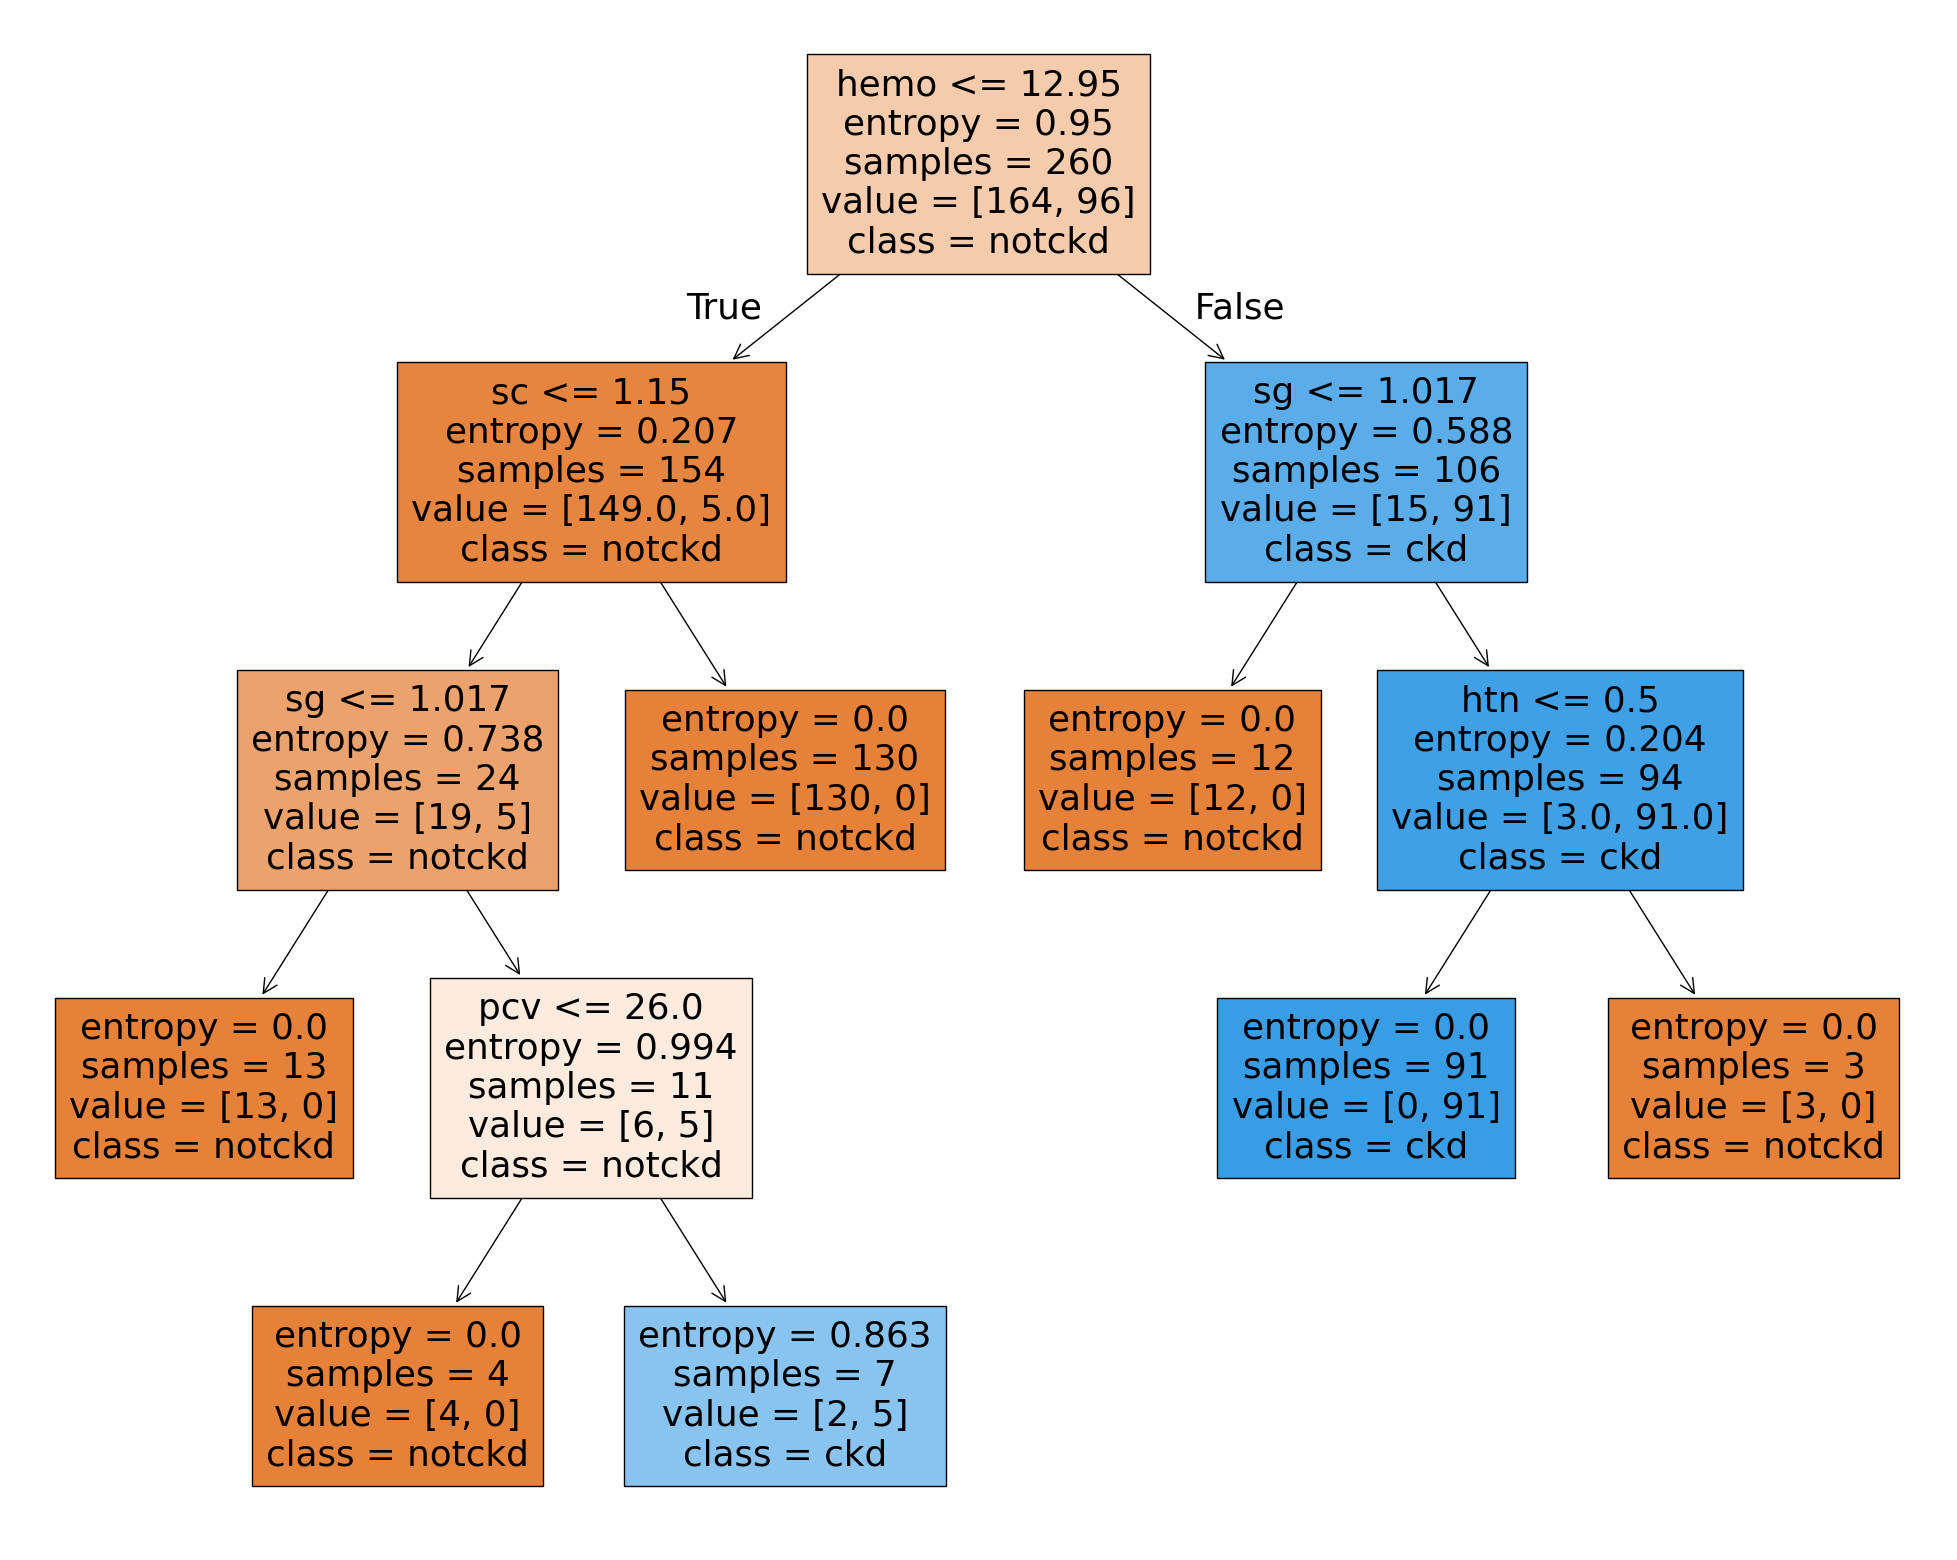

In [156]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['notckd','ckd'],
                   filled=True)

## Export to pkl

In [158]:
import joblib as jb

In [159]:
jb.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']